In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from google.colab import files


In [25]:
url = "https://gist.githubusercontent.com/pravalliyaram/5c05f43d2351249927b8a3f3cc3e5ecf/raw/Mall_Customers.csv"
df = pd.read_csv(url)
print("✅ Dataset Loaded Successfully")
df.head()

✅ Dataset Loaded Successfully


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
df = df.drop(['CustomerID'], axis=1)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})


In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)



In [28]:
linked = linkage(X_scaled, method='ward')


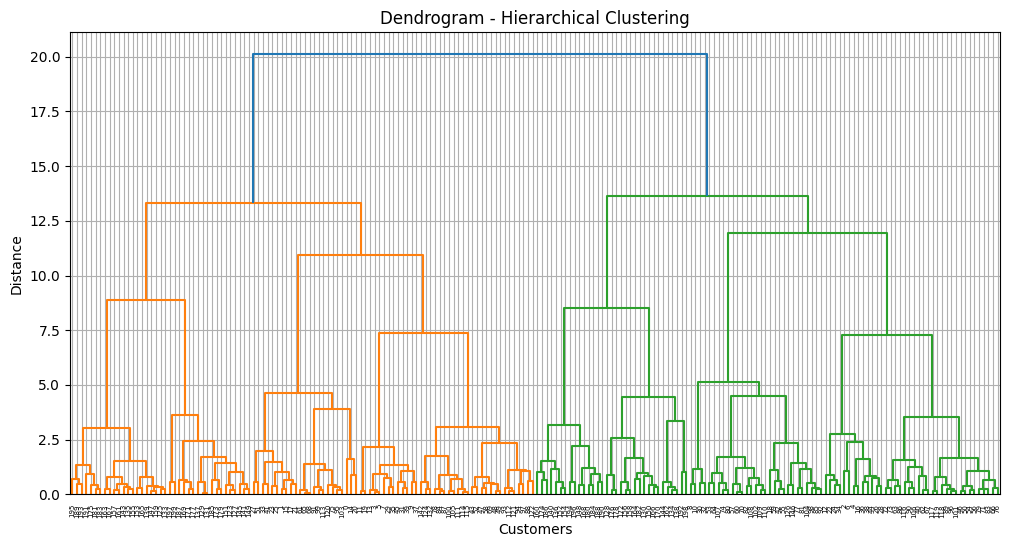

In [29]:
plt.figure(figsize=(12, 6))
dendrogram(linked)
plt.title('Dendrogram - Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

In [30]:
df['Cluster'] = fcluster(linked, 4, criterion='maxclust')

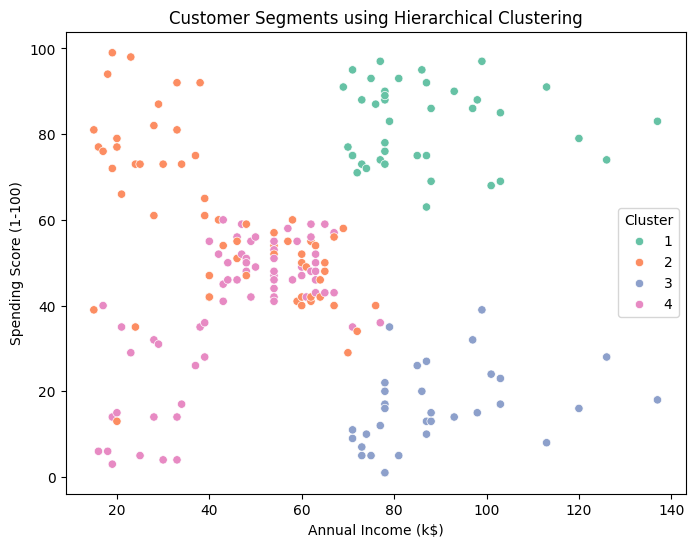

In [31]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2')
plt.title("Customer Segments using Hierarchical Clustering")
plt.show()

In [32]:
df.to_csv("hierarchical_clusters.csv", index=False)
print("📁 hierarchical_clusters.csv file saved.")

📁 hierarchical_clusters.csv file saved.


In [33]:
files.download("hierarchical_clusters.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>